In [64]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [65]:
plt.style.use('seaborn-colorblind')
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['text.color'] = 'k'

In [66]:
#READING THE DATA FROM THE CSV FILE
data=pd.read_csv('./case_time_series.csv')
data.head(10)

,Date,Daily_cases
0,2020-02-01,0
1,2020-02-02,1
2,2020-02-03,1
3,2020-02-04,0
4,2020-02-05,0
5,2020-02-06,0
6,2020-02-07,0
7,2020-02-08,0
8,2020-02-09,0
9,2020-02-10,0


In [67]:
#Data types of data present
data.dtypes

Date           object
Daily_cases     int64
dtype: object

In [68]:
#BASIC DESCRIPTION OF DATASET (MATHEMATICS DESCRIPTION)
data.describe()

,Daily_cases
count,647.000000
mean,53223.805255
std,78130.609679
min,0.000000
25%,12240.000000
50%,30549.000000
75%,55532.000000
max,414188.000000


# DATA PREPROCESSING

### As here the data collected is already in sorted way so no need of sorting the data using libraries

In [69]:
#Check whether any data is absent or not
data.isnull().sum()

Date           0
Daily_cases    0
dtype: int64

In [70]:
#Data type conversion
data['Date'] = data['Date'].astype('datetime64[ns]')

In [71]:
data = data.set_index('Date')
data.index

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', name='Date', length=647, freq=None)

In [72]:
# average the daily cases value for each month 
# use start of each month as the timestamp
y = data['Daily_cases'].resample('MS').mean()
y['2020':]

Date
2020-02-01         0.068966
2020-03-01        44.967742
2020-04-01      1115.533333
2020-05-01      5024.064516
2020-06-01     13162.400000
2020-07-01     35822.806452
2020-08-01     64360.580645
2020-09-01     87380.600000
2020-10-01     60370.903226
2020-11-01     42624.233333
2020-12-01     26577.419355
2021-01-01     15190.354839
2021-02-01     12665.392857
2021-03-01     35787.870968
2021-04-01    231443.466667
2021-05-01    290647.580645
2021-06-01     74553.000000
2021-07-01     42028.387097
2021-08-01     37258.741935
2021-09-01     31862.066667
2021-10-01     16745.387097
2021-11-01     11412.375000
Freq: MS, Name: Daily_cases, dtype: float64

# DATA VISUALIZATION

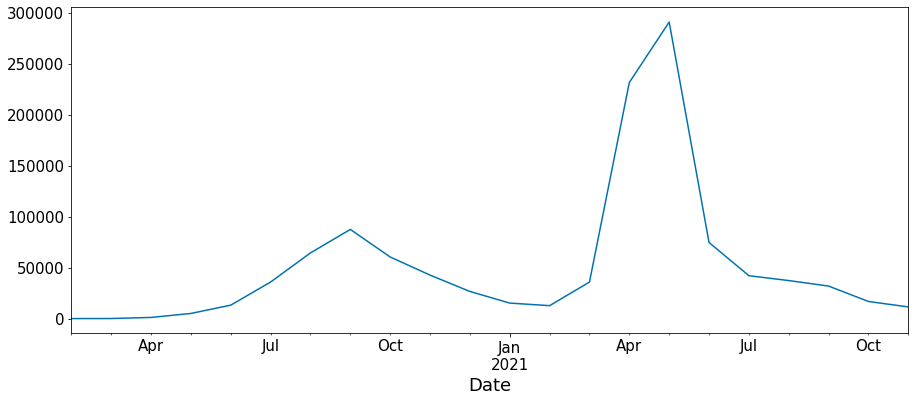

In [73]:
y.plot(figsize=(15,6))
plt.show()

## Time series can be decomposed into three distinct components
### Trend, Seasonality, Noise

C:\Users\prach\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


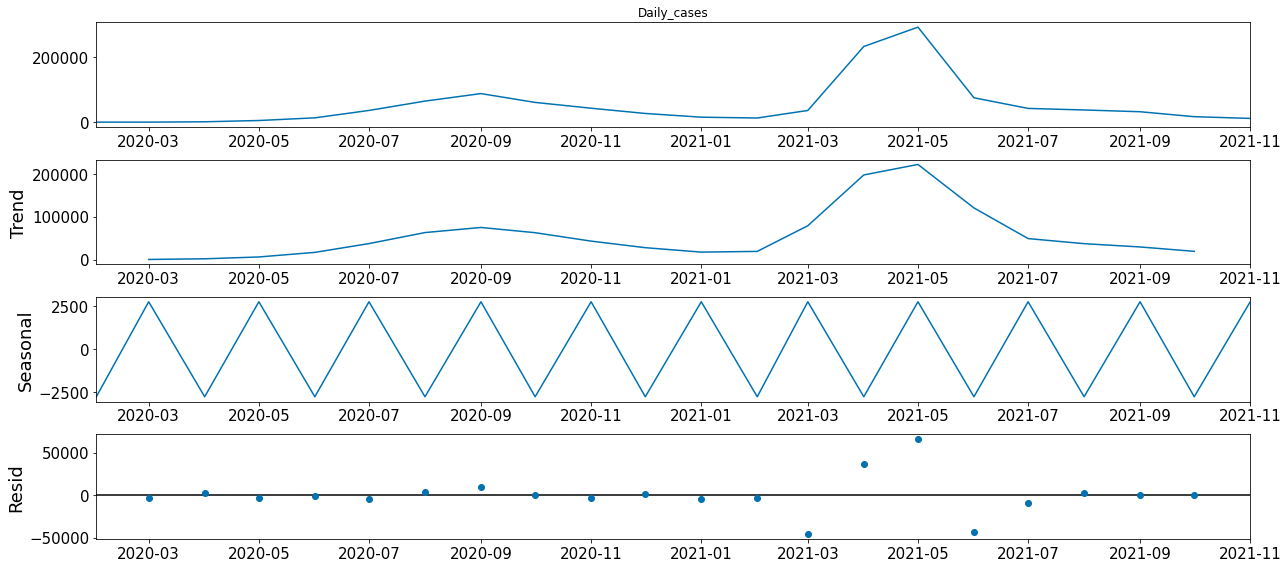

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive',freq=2)
fig = decomposition.plot()
plt.show()

# ARIMA MODEL

In [75]:
#Settings for fixing the values of a,b,c
a = b = c = range(0,2)

In [76]:
#take all possible combination for p, d and q
abc = list(itertools.product(a, b, c))
seasonal_abc = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]

In [77]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[1]))
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[2]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[3]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [78]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for prm in abc:
    for prm_s in seasonal_abc:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = prm, seasonal_order = prm_s,enforce_invertibility= False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(prm, prm_s, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:565.2365453847842
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:569.1937590509601
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:268.5761185838393


C:\Users\prach\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:266.24111689736384
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:570.6811633929121
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:569.0666114007328
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:266.3434511579857
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:268.23440474990736
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:551.1783332442815
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:553.0846691056246
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:257.77742899135916
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:259.7683245144268
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:553.0841817692576
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:555.0841814069904
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:259.7683920504023
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:261.76837560938026
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:528.2282685472841
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:530.2117889155058
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:240.40253574537434
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:237.1015791605893
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:535.4191864209303
ARIMA

In [79]:
#optimal combination of a, b, c (lowest AIC score)
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),seasonal_order = (1, 1, 0, 8), enforce_invertibility= False)
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Daily_cases   No. Observations:                   22
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 8)   Log Likelihood                -162.009
Date:                            Thu, 11 Nov 2021   AIC                            332.017
Time:                                    11:55:53   BIC                            334.277
Sample:                                02-01-2020   HQIC                           331.553
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4271      1.007     -0.424      0.672      -2.402       1.547
ma.L1          1.0000      0.621   

C:\Users\prach\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


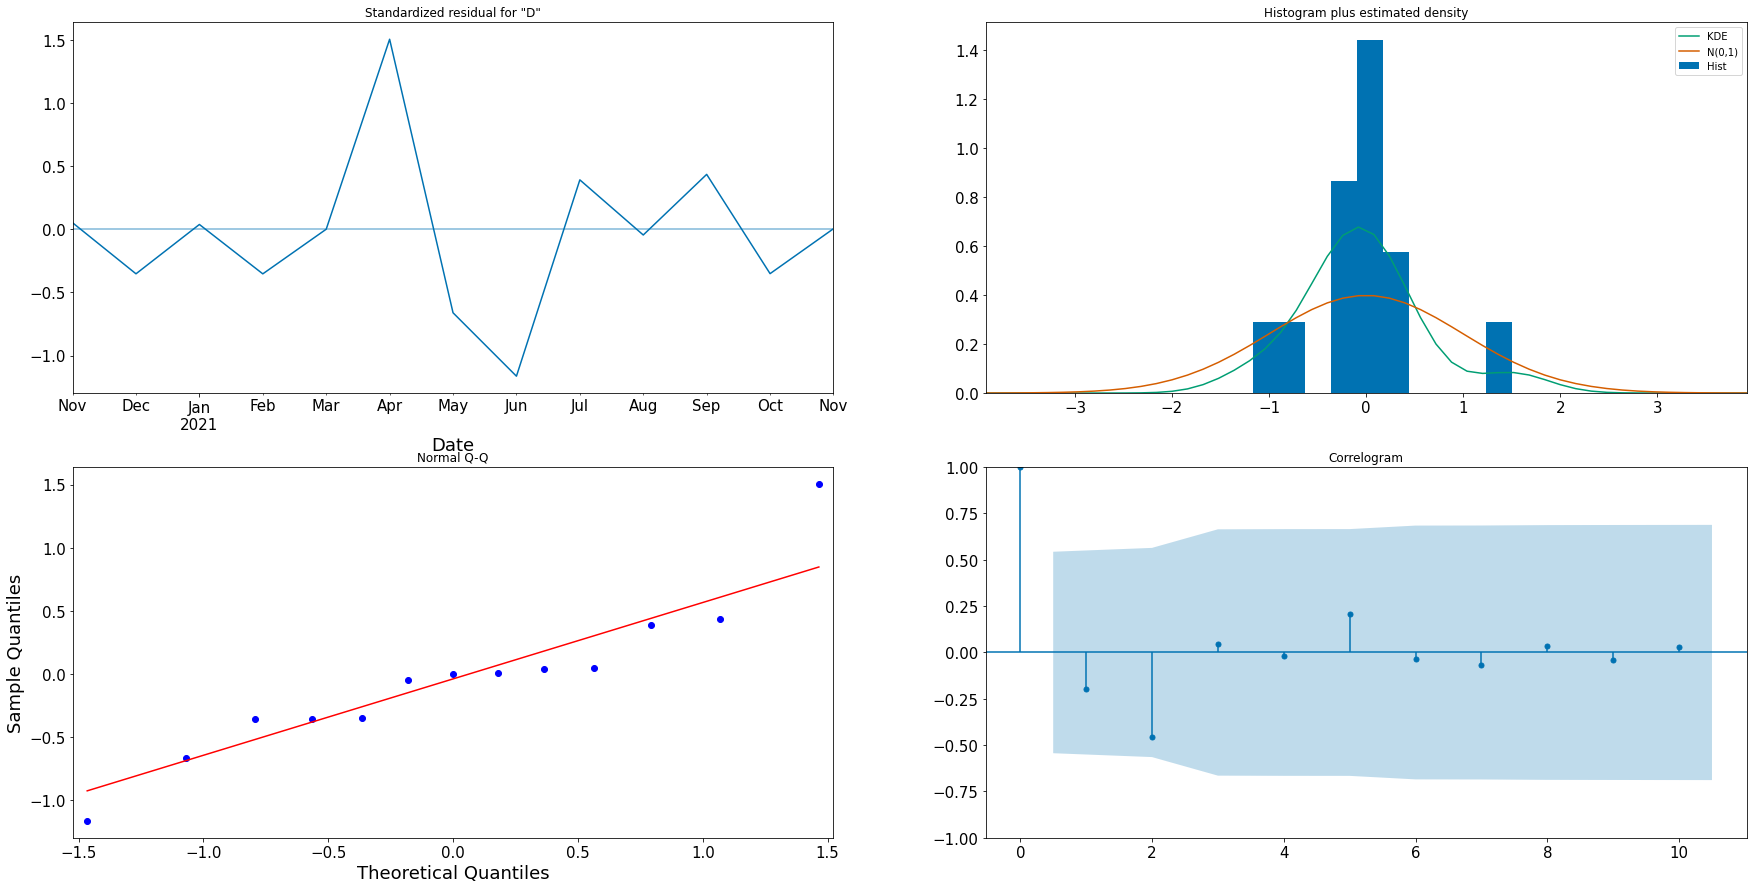

In [80]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (30, 15))
#print(result.resid.shape[0] , max(5,np.maximum(result.loglikelihood_burn,result.nobs_diffuse)))
plt.show()

In [81]:
prediction = result.get_prediction(start = pd.to_datetime('2021-06-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

C:\Users\prach\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower Daily_cases,upper Daily_cases
Date,,
2021-06-01,6158.335031,342466.831552
2021-07-01,-159679.354303,176624.979483
2021-08-01,-127017.236484,209287.097302
2021-09-01,-173575.828231,162728.505554
2021-10-01,-121281.597951,215022.735833
2021-11-01,-157123.016459,179181.317326


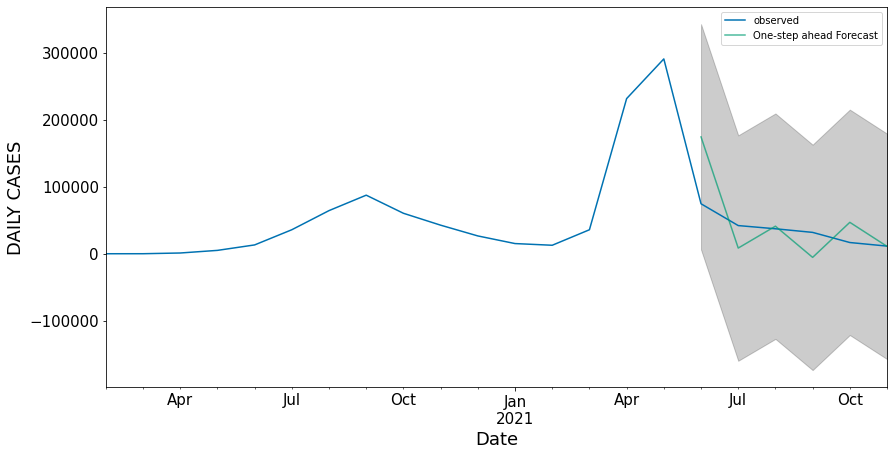

In [82]:
#Visualize the forecasting
ax = y['2020':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('DAILY CASES')
plt.legend()
plt.show()

In [85]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2021-11-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 146861.07
The Root Mean Squared Error of our forecasts is 383.22


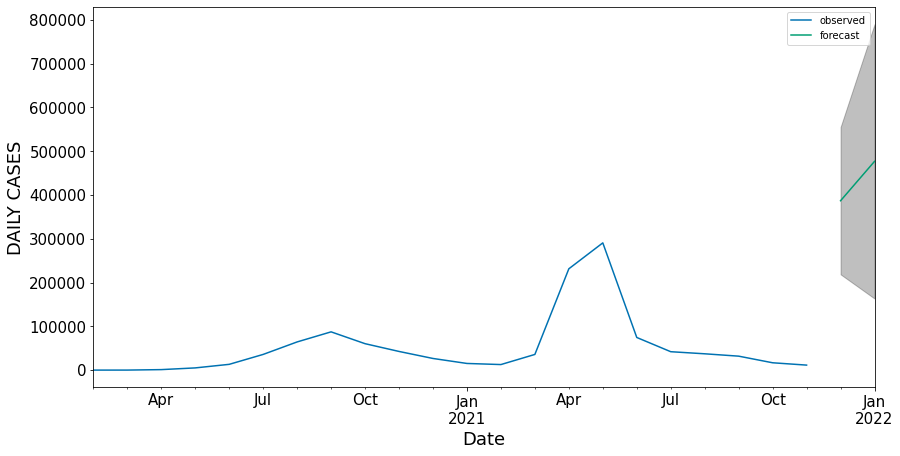

In [84]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 2)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('DAILY CASES')

plt.legend()
plt.show()